Number of training examples: 67
Number of test examples: 33
Number of examples: 100


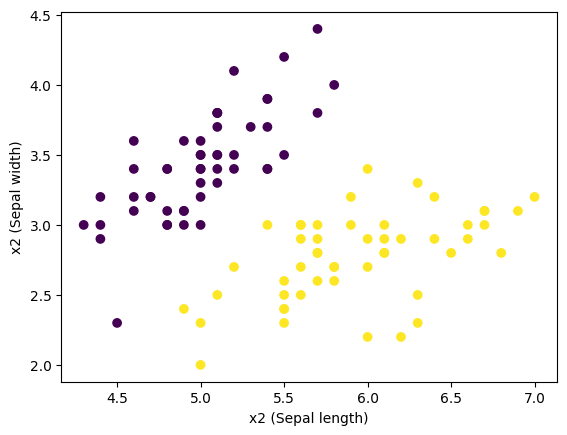

In [281]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris_dataset = datasets.load_iris()
X = iris_dataset.data[:, :2]  # For illustration purposes, we'll use only the first two input variables of this dataset
y = iris_dataset.target

# The examples are sorted by their classes.
# Let's get only the examples corresponding to the first two classes.
for c in range(len(y)):
    if y[c] == 2:
        break
y = y[:c]
X = X[:c,:]

y[y == 0] = -1 #We're doing LINEAR CLASSIFICATION. So, it's +1 or -1 

#Add the dummy variable 1 to the end of X: 
X = np.hstack((X,np.ones((X.shape[0], 1))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

print("Number of training examples:", len(y_train))
print("Number of test examples:", len(y_test))



print("Number of examples:", len(y))

# We can create a plot of the data as follows, where each class is printed in a different colour.
# As you'll see, the data are linearly separable and there are only two classes now.
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("x2 (Sepal length)")
plt.ylabel("x2 (Sepal width)")
plt.show()

# L1, L2 Hinge loss for linear classification

In [282]:
from numpy.typing import NDArray
from typing import Tuple, List
import random

def sgd(X: NDArray[np.float64], y: NDArray[np.float64], max_iterations: int = 100000, gamma: float = 0.01, eta: float = 0.01) -> Tuple[NDArray[np.float64], List[float]]:
    loss_history = [] #Aggregate the loss history so we can plot it. 
    w = np.random.rand(X.shape[1]) #One weight for each feature
    for iteration in range(max_iterations):
        idx = random.randint(0, X.shape[0] - 1)
        x_i = X[idx, :]
        y_i = y[idx]
        gradient = l2_hinge_loss_gradient(x_i, y_i, w)
        loss = l2_hinge_loss(x_i, y_i, w)
        
        if loss > 0:
            w -= (eta * gradient) + (gamma * w) 
            loss_history.append(loss)
        else:
            w -= (gamma * w)
        
        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Loss: {loss}")    
            
    return w, loss_history

def l2_hinge_loss(X: NDArray[np.float64], y: NDArray[np.float64], w: NDArray[np.float64]) -> float:
    y_pred = np.dot(w.T, X)
    l2_loss = max(0, (1 - y * y_pred)**2)
    return  l2_loss / 2
    
    
def l2_hinge_loss_gradient(X: NDArray[np.float64], y: NDArray[np.float64], w: NDArray[np.float64]) -> NDArray[np.float64]:
    y_pred = np.dot(w.T, X.T)
    margin = np.dot(y.T, y_pred)
    idk = np.dot(y.T, X.T)
    return (margin - 1)*idk

In [283]:
w, loss_history = sgd(X_train, y_train)

Iteration 0, Loss: 13.443197038124538
Iteration 100, Loss: 0.5156290711090589
Iteration 200, Loss: 0.6358677201363764
Iteration 300, Loss: 0.272602038490784
Iteration 400, Loss: 0.33922717284709325
Iteration 500, Loss: 0.2464186923632598
Iteration 600, Loss: 0.3748514349993751
Iteration 700, Loss: 0.6650714963608646
Iteration 800, Loss: 0.5882020349098087
Iteration 900, Loss: 0.29020369401095575
Iteration 1000, Loss: 0.8079266984007984
Iteration 1100, Loss: 0.10167314694687961
Iteration 1200, Loss: 0.2712665029279103
Iteration 1300, Loss: 0.01909336446607129
Iteration 1400, Loss: 1.4579040441228022
Iteration 1500, Loss: 0.14477511093153478
Iteration 1600, Loss: 0.05132537443556813
Iteration 1700, Loss: 0.6428257427247891
Iteration 1800, Loss: 0.4191381716935397
Iteration 1900, Loss: 0.10931858807434874
Iteration 2000, Loss: 0.6443028810599113
Iteration 2100, Loss: 0.27822454898714666
Iteration 2200, Loss: 1.2801743845196494
Iteration 2300, Loss: 0.36370754984099624
Iteration 2400, Loss

Iteration 8700, Loss: 1.183866609970129
Iteration 8800, Loss: 0.4413670427342128
Iteration 8900, Loss: 0.11922497513123435
Iteration 9000, Loss: 0.027082348842705557
Iteration 9100, Loss: 0.1009866573902918
Iteration 9200, Loss: 0.0010631574100250112
Iteration 9300, Loss: 0.8998023395835182
Iteration 9400, Loss: 0.7292519304571904
Iteration 9500, Loss: 0.057989907970923175
Iteration 9600, Loss: 0.3262819954684246
Iteration 9700, Loss: 0.3086373440803186
Iteration 9800, Loss: 0.23026670136946129
Iteration 9900, Loss: 0.21736272344439642
Iteration 10000, Loss: 0.6726506590958927
Iteration 10100, Loss: 0.7620902221309821
Iteration 10200, Loss: 0.5957731970696135
Iteration 10300, Loss: 1.0671810944603533
Iteration 10400, Loss: 0.26080731971567855
Iteration 10500, Loss: 0.632613272014873
Iteration 10600, Loss: 0.9914076900425483
Iteration 10700, Loss: 0.48683235803426084
Iteration 10800, Loss: 0.0438033575820791
Iteration 10900, Loss: 0.36313110290855644
Iteration 11000, Loss: 0.50551319166

In [284]:
total_test_loss = 0
for i in range(X_test.shape[0]):
    total_test_loss += l2_hinge_loss(X_test[0], y_test[0], w)

total_test_loss / X.shape[0]

0.10836316632163384

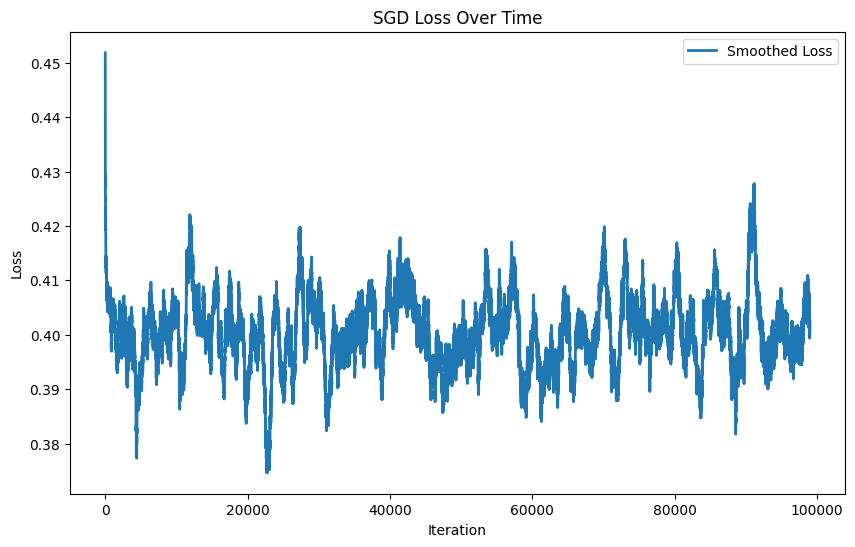

In [285]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming loss_history contains your SGD loss values
window_size = 1000  # Choose a window size for smoothing
window = np.ones(window_size) / window_size
smoothed_loss = np.convolve(loss_history, window, mode='valid')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(smoothed_loss, label='Smoothed Loss', linewidth=2)
plt.title('SGD Loss Over Time')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


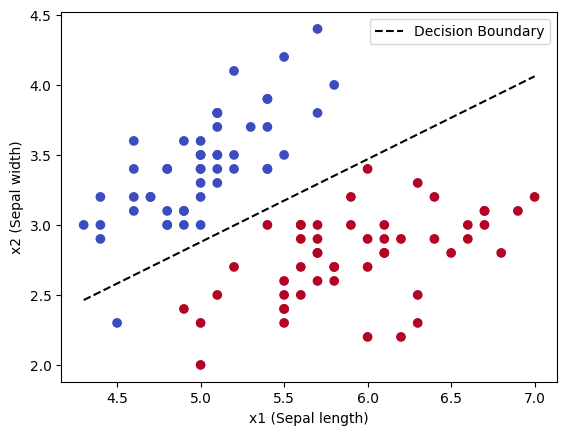

In [286]:

# Extracting the weights
w1, w2, w0 = w

# Plot data points with class labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)  # Use a color map for visual distinction
plt.xlabel("x1 (Sepal length)")
plt.ylabel("x2 (Sepal width)")

# Calculate and plot the decision boundary
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)  # Generate x values (feature 1, Sepal length)
y_values = -(w0 / w2) - (w1 / w2) * x_values  # Calculate corresponding y values (feature 2, Sepal width) for the decision boundary

# Plot the decision boundary
plt.plot(x_values, y_values, color='k', linestyle='--', label='Decision Boundary')

plt.legend()
plt.show()